# Spectrum Plot
This notebook is used for testing and benchmarking performance of spectrum plot.

In [1]:
import sys
from time import sleep
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from model.message_topic import MessageTopic
from model.protocol import Protocol
import mock_payload_generator as payload_generator
import utils
from producer import Producer


In [2]:
producer = Producer()


Producer:start: BROKER_INSTANCE = localhost:9092


### Plot Payload Size Statistics

In [3]:
channels = []
utf_payload_size = []
protobuf_payload_size = []
unit = "MB"

protobuf_payloads = []
utf_payloads = []

for channel in range(25000, 610000, 25000):
    channels.append(channel)

    payload, size = payload_generator.spectrum_json(channel)
    utf_payload_size.append(utils.convert_bytes(size, unit))
    utf_payloads.append(payload)

    payload, size = payload_generator.spectrum_protobuf(channel)
    protobuf_payload_size.append(utils.convert_bytes(size, unit))
    protobuf_payloads.append(payload)


In [4]:
# check
print(f"channels = {channels}, len(channels) = {len(channels)}")


channels = [25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000, 225000, 250000, 275000, 300000, 325000, 350000, 375000, 400000, 425000, 450000, 475000, 500000, 525000, 550000, 575000, 600000], len(channels) = 24


In [5]:
_df = []

for idx, channel in enumerate(channels):
    if len(protobuf_payload_size) > 0:
        d1 = {
            "Channel": channel,
            "Size": protobuf_payload_size[idx],
            "Encoding": "ProtoBuf",
        }
        _df.append(d1)

    if len(utf_payload_size) > 0:
        d2 = {
            "Channel": channel,
            "Size": utf_payload_size[idx],
            "Encoding": "JSON (UTF-8)",
        }
        _df.append(d2)

df = pd.DataFrame(_df)


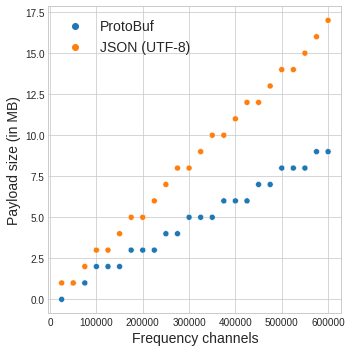

In [6]:
# plot
plt.style.use("seaborn-whitegrid")
fig = plt.figure(figsize=(5, 5), tight_layout=True)

p = sns.scatterplot(data=df, x="Channel", y="Size", hue="Encoding")

p.set_xlabel("Frequency channels", fontsize=14)
p.set_ylabel(f"Payload size (in {unit})", fontsize=14)
plt.legend(fontsize=14)


### Plot Payload Decoding Time

Send each Protobuf payload 10 times and collect decoding/deserialisation time.

In [16]:
channels = []
num_iter = 10

for channel in range(25000, 610000, 25000):
    channels.append(channel)

print(f'channels = {channels}')

channels = [25000, 75000, 125000, 175000]


In [22]:
await producer.start()

for idx in range(len(channels)):
    for d in range(num_iter):
        sleep(2)
        print(f"idx = {idx}, channels[idx] = {channels[idx]}")
        await producer.produce(protobuf_payloads[idx], f'{Protocol.PROTOBUF}_{MessageTopic.SPECTRUM}')

    sleep(5)

await producer.stop()

Producer:start: BROKER_INSTANCE = localhost:9092
idx = 0, channels[idx] = 25000
produce: sent, response = RecordMetadata(topic='protobuf_spectrum', partition=0, topic_partition=TopicPartition(topic='protobuf_spectrum', partition=0), offset=8, timestamp=1656003335490, timestamp_type=0)
idx = 0, channels[idx] = 25000
produce: sent, response = RecordMetadata(topic='protobuf_spectrum', partition=0, topic_partition=TopicPartition(topic='protobuf_spectrum', partition=0), offset=9, timestamp=1656003337557, timestamp_type=0)
idx = 1, channels[idx] = 75000
produce: sent, response = RecordMetadata(topic='protobuf_spectrum', partition=0, topic_partition=TopicPartition(topic='protobuf_spectrum', partition=0), offset=10, timestamp=1656003344643, timestamp_type=0)
idx = 1, channels[idx] = 75000
produce: sent, response = RecordMetadata(topic='protobuf_spectrum', partition=0, topic_partition=TopicPartition(topic='protobuf_spectrum', partition=0), offset=11, timestamp=1656003346775, timestamp_type=0)
i

Results

In [13]:
channels = list(range(25000, 610000, 25000))
num_iter = 10

In [14]:
protobuf_decoding_time = [
    9.300000000745058,
    8,
    3,
    3,
    3.199999999254942,
    8.600000001490116,
    9.099999999627471,
    9.300000000745058,
    9.300000000745058,
    3.200000001117587,
    7.099999999627471,
    6.299999998882413,
    7.400000000372529,
    6.800000000745058,
    6.599999999627471,
    5.599999999627471,
    5.699999999254942,
    5.800000000745058,
    5.600000001490116,
    5.699999999254942,
    9,
    9.800000000745058,
    14.700000001117587,
    9.199999999254942,
    9.900000000372529,
    8.799999998882413,
    9,
    9.5,
    8.699999999254942,
    9.5,
    12.599999999627471,
    13.300000000745058,
    12.700000001117587,
    13,
    13.099999999627471,
    12.599999999627471,
    12.299999998882413,
    13.5,
    12.699999999254942,
    13.199999999254942,
    16.800000000745058,
    16.600000001490116,
    16.40000000037253,
    16.600000001490116,
    16.700000001117587,
    16.300000000745058,
    16.40000000037253,
    16.300000000745058,
    16.90000000037253,
    16.59999999962747,
    18.90000000037253,
    18.200000001117587,
    18.700000001117587,
    18.09999999962747,
    18,
    18.200000001117587,
    21.09999999962747,
    18.40000000037253,
    19.59999999962747,
    18.5,
    22.700000001117587,
    23.299999998882413,
    25,
    23,
    22.5,
    22.90000000037253,
    22.59999999962747,
    22.700000001117587,
    23.40000000037253,
    22.40000000037253,
    30.800000000745058,
    27.40000000037253,
    25.09999999962747,
    25.199999999254942,
    25.200000001117587,
    26.899999998509884,
    26.09999999962747,
    25.59999999962747,
    25.399999998509884,
    25.800000000745058,
    30.59999999962747,
    29.300000000745058,
    27.59999999962747,
    28.09999999962747,
    27.90000000037253,
    28.200000001117587,
    28.299999998882413,
    28.09999999962747,
    27.600000001490116,
    29.40000000037253,
    34,
    31.699999999254942,
    30.40000000037253,
    30.90000000037253,
    30.700000001117587,
    31.90000000037253,
    29.199999999254942,
    29.40000000037253,
    29.5,
    31.300000000745058,
    44.40000000037253,
    36.19999999925494,
    38,
    37.30000000074506,
    37.40000000037253,
    37.5,
    36.90000000037253,
    37.399999998509884,
    37.30000000074506,
    37.59999999962747,
    43.90000000037253,
    39.90000000037253,
    41,
    38.79999999888241,
    39.59999999962747,
    38,
    43.5,
    39,
    40.30000000074506,
    38.19999999925494,
    44,
    40,
    39.80000000074506,
    47,
    41.20000000111759,
    42.20000000111759,
    39.79999999888241,
    41.30000000074506,
    41,
    42.59999999962747,
    47.69999999925494,
    44.40000000037253,
    44.90000000037253,
    45.5,
    44,
    44,
    44.70000000111759,
    44.59999999962747,
    46.80000000074506,
    45.29999999888241,
    62.5,
    45.59999999962747,
    49.19999999925494,
    49.5,
    45.5,
    46.79999999888241,
    46.69999999925494,
    48.19999999925494,
    49.40000000037253,
    47.5,
    60.79999999888241,
    53.70000000111759,
    53.40000000037253,
    51.59999999962747,
    54.29999999888241,
    52.80000000074506,
    53.09999999962747,
    54.30000000074506,
    54.100000001490116,
    54,
    59.399999998509884,
    56.30000000074506,
    56.59999999962747,
    55.80000000074506,
    59.30000000074506,
    58.90000000037253,
    60.5,
    58.69999999925494,
    57.80000000074506,
    58,
    61.5,
    61.40000000037253,
    64.20000000111759,
    74.10000000149012,
    60.79999999888241,
    64.59999999962747,
    63.90000000037253,
    70.30000000074506,
    63.100000001490116,
    60.19999999925494,
    62.70000000111759,
    62.20000000111759,
    63.59999999962747,
    61.20000000111759,
    65.40000000037253,
    61.69999999925494,
    61.09999999962747,
    60.40000000037253,
    62.90000000037253,
    62.5,
    66.40000000037253,
    63.40000000037253,
    64.70000000111759,
    65.40000000037253,
    62.59999999962747,
    66,
    63.30000000074506,
    64.90000000037253,
    66.19999999925494,
    63.80000000074506,
    73.70000000111759,
    67.19999999925494,
    65.40000000037253,
    64.5,
    68.09999999962747,
    66.59999999962747,
    65.30000000074506,
    65.5,
    77.29999999888241,
    65.59999999962747,
    68.30000000074506,
    67.79999999888241,
    66.70000000111759,
    67.59999999962747,
    70.29999999888241,
    67.59999999962747,
    69.10000000149012,
    68.59999999962747,
    68.30000000074506,
    68,
    74.30000000074506,
    74.90000000037253,
    70.90000000037253,
    72.20000000111759,
    70.5,
    69.79999999888241,
    71.19999999925494,
    71.80000000074506,
    69.90000000037253,
    70.80000000074506,
    93.40000000037253,
    83.5,
    80.59999999962747,
    78.40000000037253,
    81.90000000037253,
    81.5,
    80.80000000074506,
    85.80000000074506,
    86.20000000111759,
    79.29999999888241,
]


JSON/UTF-8

In [ ]:
for idx in range(len(channels)):
    for d in range(num_iter):
        sleep(2)
        print(f"idx = {idx}, channels[idx] = {channels[idx]}")
        await produce(utf_payloads[idx], "spectrum-json")

    sleep(5)


Results

In [15]:
utf_decoding_time = [
    # delete first two data points
    4.599999997764826,
    3.399999998509884,
    3.600000001490116,
    3.599999997764826,
    3.800000000745058,
    3.699999999254942,
    3.5,
    3.5,
    3.399999998509884,
    3.699999999254942,
    6.800000000745058,
    7.199999999254942,
    7.400000002235174,
    6.900000002235174,
    7.800000000745058,
    6.699999999254942,
    7,
    7.099999997764826,
    7.300000000745058,
    7.199999999254942,
    11.399999998509884,
    11.300000000745058,
    12.300000000745058,
    12.299999997019768,
    10.900000002235174,
    11,
    11.600000001490116,
    10.800000000745058,
    10.5,
    10.599999997764826,
    17.900000002235174,
    15.699999999254942,
    14.700000002980232,
    14.600000001490116,
    15,
    15,
    14.600000001490116,
    14.5,
    14.800000000745058,
    14.400000002235174,
    17.600000001490116,
    17.5,
    17.800000000745058,
    18.300000000745058,
    18.099999997764826,
    17.800000000745058,
    18.300000000745058,
    17.800000000745058,
    17.699999999254942,
    17.600000001490116,
    21.399999998509884,
    26.400000002235174,
    25.200000002980232,
    24,
    24.699999999254942,
    21.300000000745058,
    23.5,
    20.900000002235174,
    24.100000001490116,
    23.899999998509884,
    26.899999998509884,
    26.599999997764826,
    26.699999999254942,
    25.199999999254942,
    25.099999997764826,
    25,
    25,
    26.100000001490116,
    27.100000001490116,
    24.600000001490116,
    28.600000001490116,
    40.30000000074506,
    32,
    28.099999997764826,
    29.400000002235174,
    29.600000001490116,
    28.900000002235174,
    29.300000000745058,
    28.199999999254942,
    28.400000002235174,
    37.30000000074506,
    33.600000001490116,
    38.100000001490116,
    33.900000002235174,
    37.69999999925494,
    34,
    39.19999999925494,
    34.899999998509884,
    37.80000000074506,
    32.399999998509884,
    44.099999997764826,
    38.20000000298023,
    44.29999999701977,
    39,
    44.100000001490116,
    36.600000001490116,
    44.5,
    37.399999998509884,
    41.400000002235174,
    37.69999999925494,
    48.80000000074506,
    51.30000000074506,
    45.599999997764826,
    45.79999999701977,
    39.80000000074506,
    46.599999997764826,
    41.400000002235174,
    46.19999999925494,
    39.899999998509884,
    47.30000000074506,
    60.20000000298023,
    48.899999998509884,
    49.29999999701977,
    51.099999997764826,
    55.900000002235174,
    47.099999997764826,
    54.30000000074506,
    48,
    54.30000000074506,
    47.599999997764826,
    60.69999999925494,
    49.19999999925494,
    52.599999997764826,
    48,
    51,
    47.899999998509884,
    53.399999998509884,
    48.600000001490116,
    52.70000000298023,
    50.099999997764826,
    66.5,
    63.100000001490116,
    57.899999998509884,
    61.69999999925494,
    57.600000001490116,
    61.100000001490116,
    59.79999999701977,
    64.10000000149012,
    63.80000000074506,
    55.5,
    70.10000000149012,
    67.19999999925494,
    69.5,
    67.80000000074506,
    67.79999999701977,
    66.80000000074506,
    67.19999999925494,
    67.69999999925494,
    69.5,
    67.60000000149012,
    73.69999999925494,
    67.89999999850988,
    70.30000000074506,
    68.5,
    72.29999999701977,
    67.90000000223517,
    70,
    68.90000000223517,
    70.39999999850988,
    69.5,
    106,
    76.10000000149012,
    77.39999999850988,
    81.39999999850988,
    82.19999999925494,
    79.80000000074506,
    83.30000000074506,
    80.80000000074506,
    82.5,
    81.09999999776483,
    101.39999999850988,
    81.5,
    83.89999999850988,
    86.30000000074506,
    84,
    83.39999999850988,
    82.69999999925494,
    84.39999999850988,
    81.69999999925494,
    84.59999999776483,
    110.60000000149012,
    76.19999999925494,
    84.20000000298023,
    84.39999999850988,
    87.60000000149012,
    84.40000000223517,
    85.39999999850988,
    87.30000000074506,
    82.80000000074506,
    85,
    119,
    85.90000000223517,
    85.89999999850988,
    86.10000000149012,
    86.60000000149012,
    88.19999999925494,
    86.70000000298023,
    88.90000000223517,
    84.19999999925494,
    86.30000000074506,
    150.69999999925494,
    90.59999999776483,
    88,
    89.80000000074506,
    89,
    90.39999999850988,
    88.20000000298023,
    91.19999999925494,
    88.39999999850988,
    89.10000000149012,
    139.80000000074506,
    101.29999999701977,
    90.69999999925494,
    90.20000000298023,
    91.30000000074506,
    90.09999999776483,
    91.69999999925494,
    88.59999999776483,
    89.40000000223517,
    91.60000000149012,
    150.19999999925494,
    99.5,
    103.30000000074506,
    102.69999999925494,
    102.80000000074506,
    102.89999999850988,
    101.89999999850988,
    101.09999999776483,
    102.10000000149012,
    108.19999999925494,
    159.09999999776483,
    103,
    105.19999999925494,
    102.60000000149012,
    103.69999999925494,
    106.90000000223517,
    102.10000000149012,
    103.69999999925494,
    127.30000000074506,
    104.09999999776483,
]


Convert to DataFrame and plot

In [18]:
idx = 0

for channel in channels:
    for itr in range(num_iter):

        if len(protobuf_decoding_time) > 0:
            d1 = {
                "Channel": channel,
                "Itr": itr,
                "Time": protobuf_decoding_time[idx],
                "Encoding": "ProtoBuf",
            }
            _df.append(d1)

        if len(utf_decoding_time) > 0:
            d2 = {
                "Channel": channel,
                "Itr": itr,
                "Time": utf_decoding_time[idx],
                "Encoding": "JSON (UTF-8)",
            }
            _df.append(d2)

        idx += 1

df = pd.DataFrame(_df)


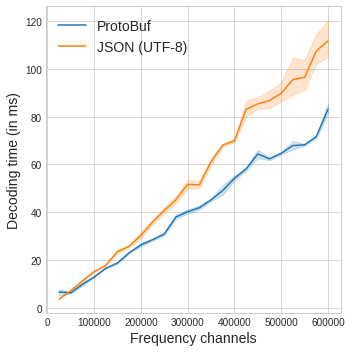

In [19]:
# plot
plt.style.use("seaborn-whitegrid")
fig = plt.figure(figsize=(5, 5), tight_layout=True)

p = sns.lineplot(data=df, x="Channel", y="Time", hue="Encoding")

p.set_xlabel("Frequency channels", fontsize=14)
p.set_ylabel(f"Decoding time (in ms)", fontsize=14)
plt.legend(fontsize=14)


### Browser Performance

- In `visualisation/src/lib/spectrum-plot-svg.ts` enable/disable CF plot function: `this.drawConfidenceIntervals(data);`

- Start performance recording at browser inspector 
- Send Protobuf payloads to browser

In [6]:
r = range(20000, 220000, 20000)
print(list(r), len(r))

[20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000] 10


In [6]:
await producer.start(); 
sleep(2); print(f"started"); count = 1;

for channel in r:
    payload, _ = payload_generator.spectrum_protobuf(channel)
    res = await producer.produce(payload, f'{Protocol.PROTOBUF}_{MessageTopic.SPECTRUM}')
    
    print(f"counter = {count}"); count += 1; sleep(1)
    
print(f"stop")
await producer.stop()

Producer:start: BROKER_INSTANCE = localhost:9092
started
counter = 1
counter = 2
counter = 3
counter = 4
counter = 5
counter = 6
counter = 7
counter = 8
counter = 9
counter = 10
stop
Producer:stop: BROKER_INSTANCE = localhost:9092
